<a href="https://colab.research.google.com/github/hank199599/data_science_from_scratch_reading_log/blob/main/Chapter5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

初始化這個專案  
引用 **第四章 線性代數** 所建立的函數來協助運算

In [ ]:
from typing import List

Vector = List[float]

def dot(v:Vector,w:Vector)->float:
  #計算v_1*w_1+... +v_n*w_n
  assert len(v)==len(w),"兩個向量必須有相同的維度"

  return sum(v_i*w_i for v_i,w_i in zip(v,w))

def sum_of_squares(v:Vector) -> float:
  return dot(v,v)

# 描述單一組資料
如果資料數量不多這是一種最好的描述方式

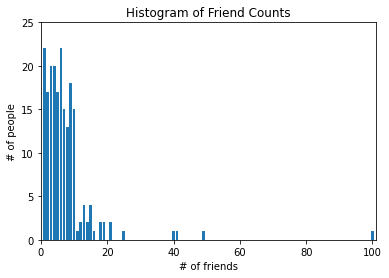

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
friend_counts = Counter(num_friends)

xs = range(101)             # 最大數字就是100
ys = [friend_counts[x] for x in xs] # 高度是朋友的數量
plt.bar(xs,ys)
plt.axis([0,101,0,25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

### 資料點的數量

In [ ]:
num_points=len(num_friends)
num_points

204

### 最大值和最小值

In [ ]:
largest_value=max(num_friends)
smallest_value=min(num_friends)

print("largest_value:",largest_value)
print("smallest_value:",smallest_value)

largest_value: 100
smallest_value: 1


### 特定位置的值


In [ ]:
sorted_values=sorted(num_friends)
smllest_value=sorted_values[0]
second_smallest_value=sorted_values[1]
second_largest_value=sorted_values[-2]

print("smllest_value:",smllest_value)
print("second_smallest_value:",second_smallest_value)
print("second_largest_value:",second_largest_value)

smllest_value: 1
second_smallest_value: 1
second_largest_value: 49


# 中央趨勢



## 平均值(mean/average)


```
平均值=資料加總/資料的數量
```

In [ ]:
def mean(xs:List[float]) -> float:
  return sum(xs) / len(xs)

mean(num_friends)

7.333333333333333

## 中位數(medium) 
首先，將資料順序排列。依據資料點數量是奇數或偶數，中位數有兩種可能計算方式：
* 奇數：正中央位置的數字
* 偶數：中央位置前後兩個數字的平均值
  
**注意事項：**  
中位數並不是跟整組資料中的每個數值都有關係

In [ ]:
def _medium_odd(xs:List[float]) ->float:
  return sorted(xs)[len(xs)//2]

def _medium_even(xs:List[float]) ->float:
  sorted_xs=sorted(xs)
  hi_midpoint=len(xs)//2
  return (sorted_xs[hi_midpoint-1]+sorted_xs[hi_midpoint])/2

def median(v:List[float])->float:
  return _medium_even(v) if len(v)%2 ==0 else _medium_odd(v)

In [ ]:
median([1,10,2,9,5])

5

In [ ]:
median([1,9,2,10])

5.5

In [ ]:
median(num_friends)

6.0

## 離群值(outlier)
在統計學中，離群值是與其他觀測值明顯不同的數據點。離群值可能是由於測量的可變性所致，也可能表明存在實驗誤差。

## 分位數 (quantile)
小於某分位數的資料，正好佔有所有資料的某個特定百分比

In [ ]:
def quantile(xs:List[float],p:float)->float:
  p_index=int(p*len(xs))
  return sorted(xs)[p_index]

In [ ]:
quantile(num_friends,0.10)

1

In [ ]:
quantile(num_friends,0.25)

3

In [ ]:
quantile(num_friends,0.75)

9

In [ ]:
quantile(num_friends,0.90)

13

## 眾數(mode)
最常出現的一個或多個數值

In [ ]:
#送回一個列表，裡頭放的是眾數(可能不只一個)
def mode(x:List[float])->List[float]:
  counts=Counter(x)
  max_count=max(counts.values())
  return [x_i for x_i,count in counts.items()
      if count == max_count]

In [ ]:
mode(num_friends)

[6, 1]

# 離散程度
衡量資料分散的程度  
* 統計值很接近零→資料分布很集中
* 統計值很大→資料分布很開

## 範圍(range}
一種衡量離散程度的方式


```
計算一組資料中最大值和最小值的差值
```



In [ ]:
# 'range' 在Python中代表特定意義，因此使用其他名稱來代稱
def data_range(sx:List[float]) ->float:
  return max(xs)-min(xs)

In [ ]:
data_range(num_friends)

100

## 變異數 σ² (variance)
在概率統計中最常使用作為測量一組數值的離散程度之用。

In [ ]:

#把xs 轉為原值與平均值的差值(將平均值降為0)
def de_mean(xs:List[float]) -> List[float]:
  x_bar = mean(xs)
  return [x - x_bar for x in xs] 

def variance(xs:List[float]) ->float:
  assert len(xs),"至少有兩個元素才能計算變異數"

  n = len(xs)
  deviations = de_mean(xs)
  return sum_of_squares(deviations) / (n-1)

In [ ]:
variance(num_friends)

81.54351395730716

(x_i-x_bar)**2的平均值只能算是x_i真正平方差的一個低估值，詳情參見[維基百科](https://en.wikipedia.org/wiki/Unbiased_estimation_of_standaerd_deviation)

## 標準差 σ (standard deviation)

In [ ]:
import math

def standard_deviation(xs:List[float]) ->float:
  return math.sqrt(variance(xs))

In [ ]:
standard_deviation(num_friends)

9.03014473623248

無論是範圍值或是標準差，都易受到**離群值**的影響

## 計算百分位差值
計算第75百分位與第25百分位的差值，避免受到少數離群值影響

In [ ]:
def interquartile_range(xs:List[float]) ->float:
  return quantile(xs,0.75) -quantile(xs,0.25)

In [ ]:
interquartile_range(num_friends)

6

# 相關 (Correlation)

## 共變異數(covariance)
衡量兩個變數分別偏離其平均值的程度

In [ ]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

daily_hours = [dm / 60 for dm in daily_minutes]

def covariance(xs:List[float],ys:List[float]) ->float:
  assert len(xs)==len(ys),"xs與ys的元素必須是相同的0"
  
  return dot(de_mean(xs),de_mean(ys))/(len(xs)-1)

In [ ]:
covariance(num_friends,daily_minutes)

22.425435139573064

In [ ]:
covariance(num_friends,daily_hours)

0.37375725232621776

## 相關係數 (Correlation coefficient)
除以兩個變數的標準差來衡量相關程度 

* 完全負相關 ：-1
* 部分負相關
* 零相關   ：0
* 部分正相關
* 完全正相關 ：1
  
**範例**：  
```
0.25 代表兩個變數間存在相對微弱的正相關
```


In [ ]:
def correlation(xs:List[float],ys:List[float]) ->float:

  stdev_x = standard_deviation(xs)
  stdev_y = standard_deviation(ys)
  if stdev_x > 0 and stdev_y > 0 :
    return covariance(xs,ys) / stdev_x / stdev_y
  else:
    return 0

In [ ]:
correlation(num_friends,daily_minutes)

0.24736957366478218

In [ ]:
correlation(num_friends,daily_hours)

0.24736957366478196

## 直接進行觀察

透過直接檢查圖像化後的資料來檢視資料特性



### 圖 5-2 相關
(其中有一個是離群值)

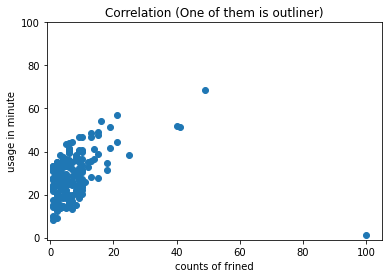

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(num_friends,daily_minutes)
plt.title("Correlation (One of them is outliner)")
plt.axis([-1,105,-1,100])
plt.xlabel("counts of frined")
plt.ylabel("usage in minute")
plt.show()

擁有100位朋友的那位使用者每天只花1分鐘在網站上，顯然是個離群值。  
剔除這筆資料後會發生甚麼事?

In [ ]:
outlier = num_friends.index(100) #離群值的索引值

num_friends_good = [ x
            for i,x in enumerate(num_friends)
            if i != outlier]

daily_minutes_good = [ x
            for i,x in enumerate(daily_minutes)
            if i != outlier]

daily_hours_good = [ dm/60 for dm in num_minutes_good]

In [ ]:
correction(num_friends_good,daily_minutes_good)

0.5736792115665573

In [ ]:
correction(num_friends_good,daily_hours_good)

0.5736792115665579

如果不考慮離群值，相關係數就會提高很多

### 圖 5-3 相關(已移除離群值)

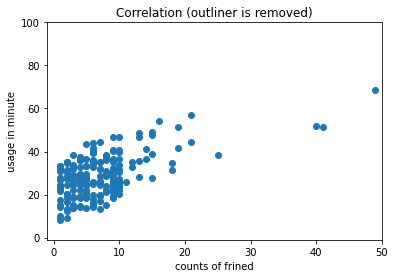

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(num_friends_good,daily_minutes_good)
plt.title("Correlation (outliner is removed)")
plt.axis([-1,50,-1,100])
plt.xlabel("counts of frined")
plt.ylabel("usage in minute")
plt.show()

# 辛普森悖論 (Simpson's Paradox)
當人們嘗試探究兩種變量（比如新生錄取率與性別）是否具有相關性的時候，會分別對之進行分組研究。  
然而，在分組比較中都占優勢的一方，在總評中有時反而是失勢的一方。  
該現象於20世紀初就有人討論，但一直到1951年，E.H.辛普森在他發表的論文中闡述此一現象後，該現象才算正式被描述解釋。後來就以他的名字命名此悖論，即辛普森悖論。  
此悖論的最終原因和選擇偏差、倖存者偏差、以及柏克森悖論一樣，是源自對撞因子。  
[參見：維基百科](https://zh.wikipedia.org/wiki/%E8%BE%9B%E6%99%AE%E6%A3%AE%E6%82%96%E8%AE%BA)